In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import requests

import os 
print(os.listdir("./data/los-angeles-traffic-collision-data"))

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

['traffic-collision-data-from-2010-to-present.csv.zip', 'socrata_metadata.json', 'traffic-collision-data-from-2010-to-present.csv']


In [5]:
#read in data
collision_data = pd.read_csv("./data/los-angeles-traffic-collision-data/traffic-collision-data-from-2010-to-present.csv")
df = pd.DataFrame(collision_data)
print(df.head(10))

   DR Number            Date Reported            Date Occurred  Time Occurred  \
0  191010770  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1216   
1  190711820  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1445   
2  192011837  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1245   
3  190613201  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1120   
4  191610033  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1015   
5  190410808  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000            630   
6  191312833  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000              1   
7  190711819  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1300   
8  191610034  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1155   
9  191911558  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000             30   

   Area ID    Area Name  Reporting District  Crime Code  \
0       10  West Valley                1009      

In [6]:
#data cleaning 
df = df.drop(['DR Number', 'Reporting District','Crime Code','MO Codes','Premise Code', 'Premise Description'], axis=1)
print(df.head(10))

df['year'] = pd.DatetimeIndex(df['Date Occurred']).year
df['month'] = pd.DatetimeIndex(df['Date Occurred']).month
df['day'] = pd.DatetimeIndex(df['Date Occurred']).day
df['time']=df['year']+(1/12)*df['month']+(1/360)*df['day']

             Date Reported            Date Occurred  Time Occurred  Area ID  \
0  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1216       10   
1  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1445        7   
2  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1245       20   
3  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1120        6   
4  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1015       16   
5  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000            630        4   
6  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000              1       13   
7  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1300        7   
8  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000           1155       16   
9  2019-06-08T00:00:00.000  2019-06-08T00:00:00.000             30       19   

     Area Name Crime Code Description  Victim Age Victim Sex Victim Descent  \
0  West Valley      TRAFFIC COLLISION         NaN  

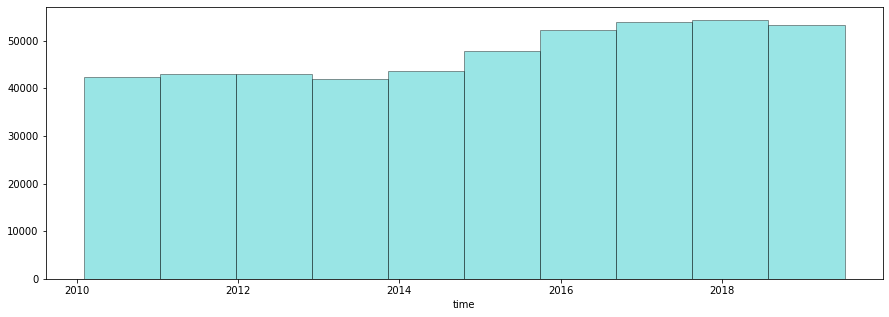

In [7]:
x = df.time
ax = sns.distplot(x, hist=True, kde=False, rug=False, color='c', bins=10,  hist_kws={'edgecolor':'black'})
plt.show()

In [8]:
near_me = df.loc[df['Address'].str.contains('VERMONT', na=False) & df['Cross Street'].str.contains('VERMONT', na=False)]
len(near_me)


22

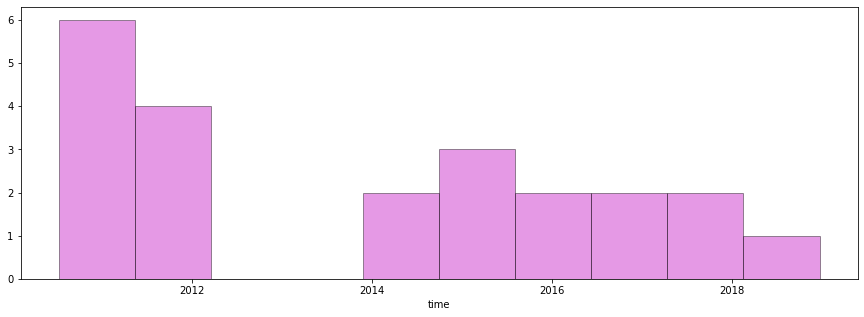

In [9]:
x = near_me.time
ax = sns.distplot(x, hist=True, kde=False, rug=False, color='m', bins=10,  hist_kws={'edgecolor':'black'})
plt.show()

In [10]:
df2=df.sort_values(by=['Area ID'])
df2.shape

(475227, 22)